## LINK TO VIDEOv- FOR BOTH SECTIONS
https://youtu.be/tvCnekfYL0s

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

columns = [
    "Sex", "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight", "Rings"
]
data = pd.read_csv("abalone.data", names=columns)
data



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
# Encode target labels
label_map = {"M": 0, "F": 1, "I": 2}
y = data["Sex"].map(label_map)
y = to_categorical(y, num_classes=3)

# Features
X = data.drop(columns=["Sex", "Rings"])


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [4]:
model = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,187 (426.51 KB)

 Trainable params: 109,187 (426.51 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5335 - loss: 0.9086 - val_accuracy: 0.5486 - val_loss: 0.8740
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5388 - loss: 0.8845 - val_accuracy: 0.5519 - val_loss: 0.8634
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5426 - loss: 0.8715 - val_accuracy: 0.5361 - val_loss: 0.9119
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5527 - loss: 0.8680 - val_accuracy: 0.5558 - val_loss: 0.8729
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5613 - loss: 0.8552 - val_accuracy: 0.5472 - val_loss: 0.8586
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5642 - loss: 0.8590 - val_accuracy: 0.5519 - val_loss: 0.8729
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5680 - loss: 0.8503 - val_accuracy: 0.5500 - val_loss: 0.8967
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5757 - loss: 0.8432 - val_accu

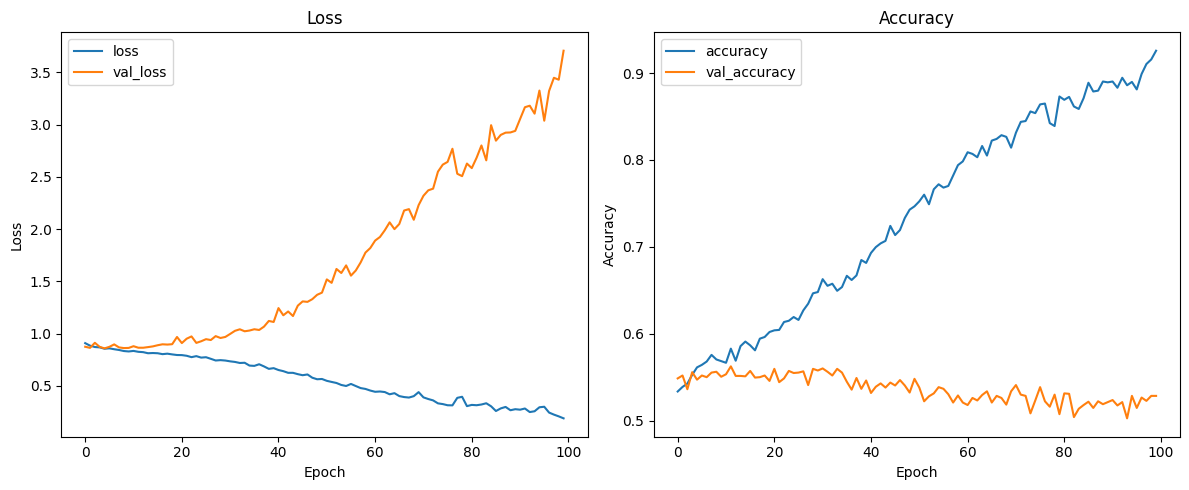

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.tight_layout()
plt.savefig("abalone-b.png", dpi=300)
plt.show()

## 1c


ler



In [7]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential([
        Dense(
            units=hp.Int("units", 16, 128, step=16),
            activation="relu",
            input_shape=(X_train.shape[1],)
        ),
        Dense(3, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("lr", [1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [8]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    directory="abalone_tuning",
    project_name="simple"
)


Reloading Tuner from abalone_tuning/simple/tuner0.json


In [9]:
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    verbose=1
)

best_model = tuner.get_best_models(1)[0]

history_tuned = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    verbose=1
)





Epoch 1/100


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5541 - loss: 0.8620 - val_accuracy: 0.5481 - val_loss: 0.8750
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5517 - loss: 0.8653 - val_accuracy: 0.5486 - val_loss: 0.8819
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5498 - loss: 0.8626 - val_accuracy: 0.5649 - val_loss: 0.8743
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5527 - loss: 0.8624 - val_accuracy: 0.5457 - val_loss: 0.8833
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5618 - loss: 0.8552 - val_accuracy: 0.5558 - val_loss: 0.8872
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5584 - loss: 0.8559 - val_accuracy: 0.5649 - val_loss: 0.8620
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5618 - loss: 0.8592 - val_accuracy: 0.5495 - val_loss: 0.8556
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5580 - loss: 0.8516 - val_ac

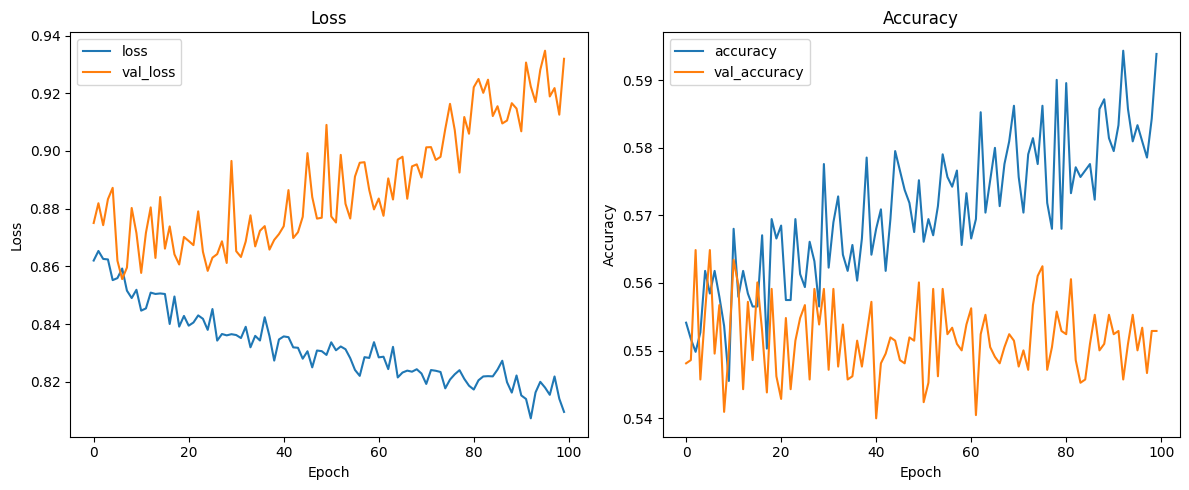

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_tuned.history["loss"], label="loss")
plt.plot(history_tuned.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_tuned.history["accuracy"], label="accuracy")
plt.plot(history_tuned.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Save the figure 
plt.tight_layout()
plt.savefig("abalone-c.png", dpi=300)
plt.show()

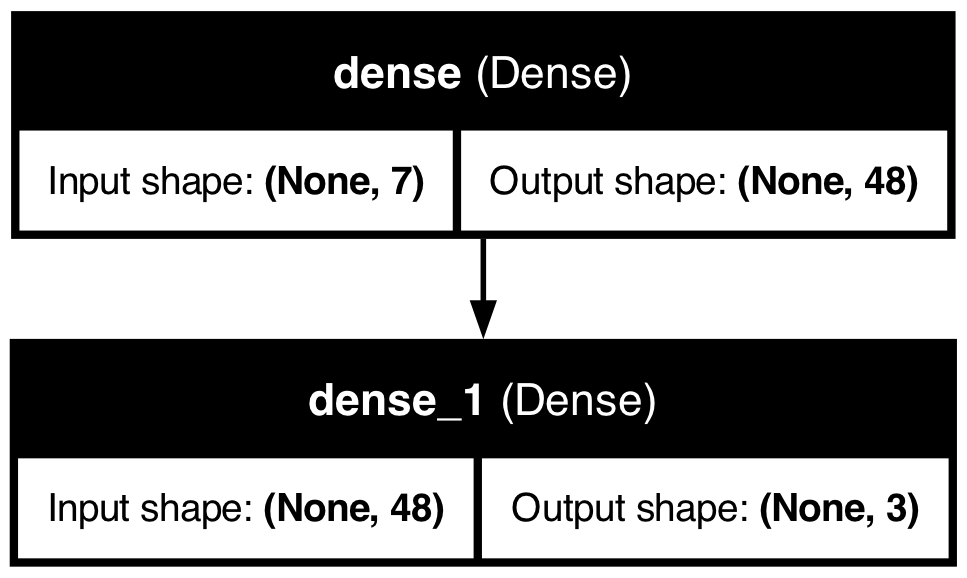

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="abalone-db.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=200
)
plot_model(
    best_model,
    to_file="abalone-dc.png",
    show_shapes=True,
    show_layer_names=True
)
